In [98]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from skimage.filters import threshold_multiotsu
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import ConfusionMatrixDisplay

Data type: float64
Data shape: (2000, 2)


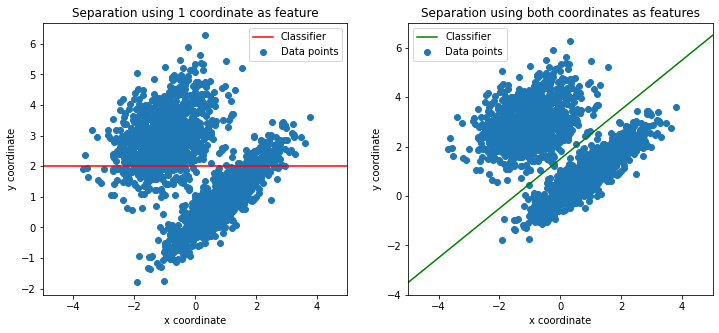

In [67]:
data = loadmat('./data/cdata.mat')
data= np.array(data['cdata'])
print(f'Data type: {data.dtype}')
print(f'Data shape: {data.shape}')

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax0.scatter(x=data[:,0], y=data[:,1], label='Data points')
ax0.plot(np.linspace(start=-5, stop=5, num=1000), np.full(shape=(1000), fill_value=2), 'r-', label='Classifier')
ax0.set_xlabel('x coordinate')
ax0.set_ylabel('y coordinate')
ax0.set_xlim([-5,5])
ax0.set_title('Separation using 1 coordinate as feature')
ax0.legend()

ax1.scatter(x=data[:,0], y=data[:,1], label='Data points')
xs = np.linspace(start=-5, stop=5, num=1000)
ax1.plot(xs, xs + 1.5, 'g-', label='Classifier')
ax1.set_xlabel('x coordinate')
ax1.set_ylabel('y coordinate')
ax1.set_xlim([-5,5])
ax1.set_title('Separation using both coordinates as features')
ax1.legend()

HandBW.pnm shape: (243, 303)
HandBW.pnm dtype: uint8
HandBW.pnm max=255 and min=21


Text(0.5, 1.0, 'Classification HandBW.pnm')

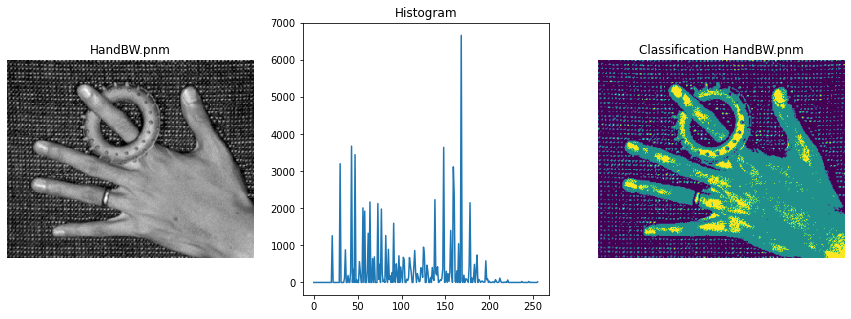

In [68]:
imbw = cv.imread('./data/handBW.pnm')
imbw = cv.cvtColor(src=imbw, code=cv.COLOR_RGB2GRAY)
print(f'HandBW.pnm shape: {imbw.shape}')
print(f'HandBW.pnm dtype: {imbw.dtype}')
print(f'HandBW.pnm max={np.max(imbw)} and min={np.min(imbw)}')
hist = cv.calcHist(images=[imbw], channels=[0], mask=None, histSize=[256], ranges=[0,256])
# threshols = threshold_multiotsu(image=im, classes=3, nbins=256)
regions = np.digitize(imbw, bins=[110, 175])

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax0.imshow(imbw, cmap=cm.gray)
ax0.axis('off')
ax0.set_title('HandBW.pnm')

ax1.plot(hist)
ax1.set_title('Histogram')

ax2.imshow(regions)
ax2.axis('off')
ax2.set_title('Classification HandBW.pnm')

Hand.pnm shape: (243, 303, 3)
Hand.pnm dtype: uint8
Hand.pnm max=217 and min=11


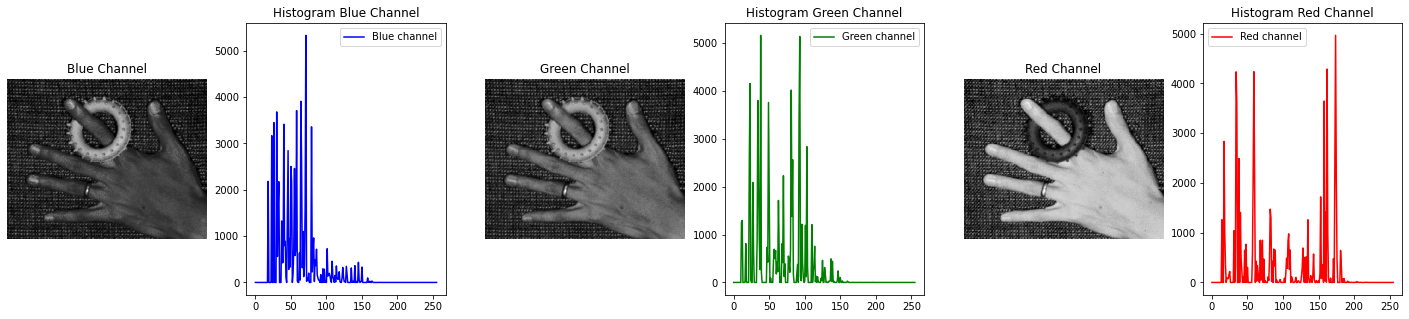

In [75]:
im = cv.imread('./data/hand.pnm')
print(f'Hand.pnm shape: {im.shape}')
print(f'Hand.pnm dtype: {im.dtype}')
print(f'Hand.pnm max={np.max(im)} and min={np.min(im)}')
hist_b = cv.calcHist(images=[im], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist_g = cv.calcHist(images=[im], channels=[1], mask=None, histSize=[256], ranges=[0, 256])
hist_r = cv.calcHist(images=[im], channels=[2], mask=None, histSize=[256], ranges=[0, 256])

fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=6, figsize=(25, 5))
ax0.imshow(im[:,:,0], cmap=cm.gray)
ax0.axis('off')
ax0.set_title('Blue Channel')
ax1.plot(hist_b, color = 'b', label='Blue channel')
ax1.set_title('Histogram Blue Channel')
ax1.legend()
ax2.imshow(im[:,:,1], cmap=cm.gray)
ax2.axis('off')
ax2.set_title('Green Channel')
ax3.plot(hist_g, color = 'g', label='Green channel')
ax3.set_title('Histogram Green Channel')
ax3.legend()
ax4.imshow(im[:,:,2], cmap=cm.gray)
ax4.axis('off')
ax4.set_title('Red Channel')
ax5.plot(hist_r, color = 'r', label='Red channel')
ax5.set_title('Histogram Red Channel')
ax5.legend()

Hand_training.png
Shape: (243, 303, 3)


Text(0.5, 1.0, 'Grayscale image & Training areas')

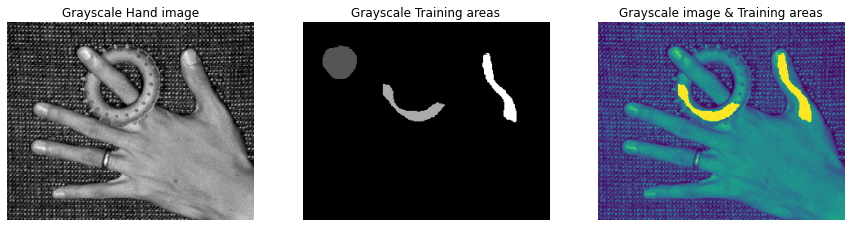

In [77]:
label = cv.imread('./data/hand_training.png')
print(f'Hand_training.png')
print(f'Shape: {label.shape}')
labelbw = cv.cvtColor(src=label, code=cv.COLOR_RGB2GRAY)
im_train = cv.addWeighted(src1=imbw, alpha=0.8, src2=cv.multiply(src1=cv.divide(src1=labelbw,src2=int(np.max(labelbw)),scale=1), src2=255.0, scale=1), beta=0.6, gamma=0)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax0.imshow(imbw[:,:], cmap=cm.gray)
ax0.axis('off')
ax0.set_title('Grayscale Hand image')
ax1.imshow(labelbw[:,:], cmap=cm.gray)
ax1.axis('off')
ax1.set_title('Grayscale Training areas')
ax2.imshow(im_train)
ax2.axis('off')
ax2.set_title('Grayscale image & Training areas')

In [72]:
def create_training_data(image, labels):
    x_coord, y_coord = labels.nonzero() # arrays containing coordinates of nonzero-valued pixels
    train_x = image[x_coord, y_coord]
    train_y = labels[x_coord, y_coord]
    return train_x, train_y

Classification of the grayscale image:

Out-of-bag accuracy estimate: 0.9300655635341867


Text(0.5, 1.0, 'Prediction')

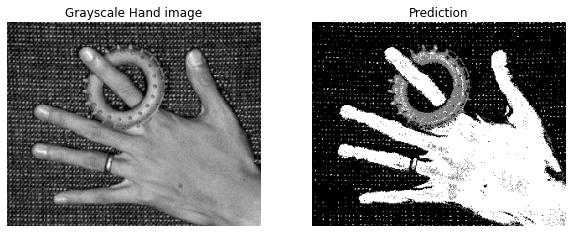

In [102]:
train_x, train_y = create_training_data(imbw, labelbw)
train_x = train_x.reshape(-1, 1)
bagging_classifier = BaggingClassifier(n_estimators=20, max_samples=0.7, oob_score=True)
bagging_classifier.fit(train_x, train_y)
print(f'Out-of-bag accuracy estimate: {bagging_classifier.oob_score_}')
predictions = bagging_classifier.predict(imbw.reshape(-1, 1))
predictions = predictions.reshape(imbw.shape)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax0.imshow(imbw[:,:], cmap=cm.gray)
ax0.axis('off')
ax0.set_title('Grayscale Hand image')
ax1.imshow(predictions[:,:], cmap=cm.gray)
ax1.axis('off')
ax1.set_title('Prediction')

Classification of the RGB image using one band at time as classification feature:

In [113]:
def train_singlefeature(image, label, model):
    train_x, train_y = create_training_data(image, label)
    train_x = train_x.reshape(-1, 1)
    if model == 'Bagging':
        classifier = BaggingClassifier(n_estimators=20, max_samples=0.75, oob_score=True)
        classifier.fit(train_x, train_y)
        print(f'Out-of-bag accuracy estimate: {classifier.oob_score_}')
    elif model == 'LDA':
        classifier = LinearDiscriminantAnalysis()
        classifier.fit(train_x, train_y)
    predictions = classifier.predict(image.reshape(-1, 1))
    predictions = predictions.reshape(image.shape)
    return predictions

Text(0.5, 1.0, 'Prediction - Red channel')

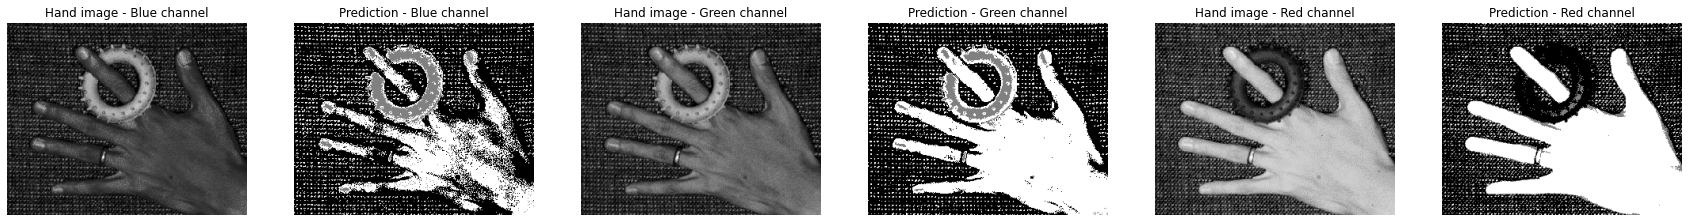

In [114]:
predictions_b = train_singlefeature(im[:,:,0], labelbw, 'LDA')
predictions_g = train_singlefeature(im[:,:,1], labelbw, 'LDA')
predictions_r = train_singlefeature(im[:,:,2], labelbw, 'LDA')

fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=6, figsize=(30, 5))
ax0.imshow(im[:,:,0], cmap=cm.gray)
ax0.axis('off')
ax0.set_title('Hand image - Blue channel')
ax1.imshow(predictions_b, cmap=cm.gray)
ax1.axis('off')
ax1.set_title('Prediction - Blue channel')
ax2.imshow(im[:,:,1], cmap=cm.gray)
ax2.axis('off')
ax2.set_title('Hand image - Green channel')
ax3.imshow(predictions_g, cmap=cm.gray)
ax3.axis('off')
ax3.set_title('Prediction - Green channel')
ax4.imshow(im[:,:,2], cmap=cm.gray)
ax4.axis('off')
ax4.set_title('Hand image - Red channel')
ax5.imshow(predictions_r, cmap=cm.gray)
ax5.axis('off')
ax5.set_title('Prediction - Red channel')

In [138]:
def train_multiplefeature(image, label, model):
    train_x, train_y = create_training_data(image, label)
    if model == 'Bagging':
        classifier = BaggingClassifier(n_estimators=20, max_samples=0.75, oob_score=True)
        classifier.fit(train_x, train_y)
        print(f'Out-of-bag accuracy estimate: {classifier.oob_score_}')
    elif model == 'LDA':
        classifier = LinearDiscriminantAnalysis()
        classifier.fit(train_x, train_y)
    predictions = classifier.predict(image.reshape(-1, image.shape[2]))
    predictions = predictions.reshape(image.shape[0], image.shape[1])
    return predictions

Text(0.5, 1.0, 'Prediction - Green + Red channels')

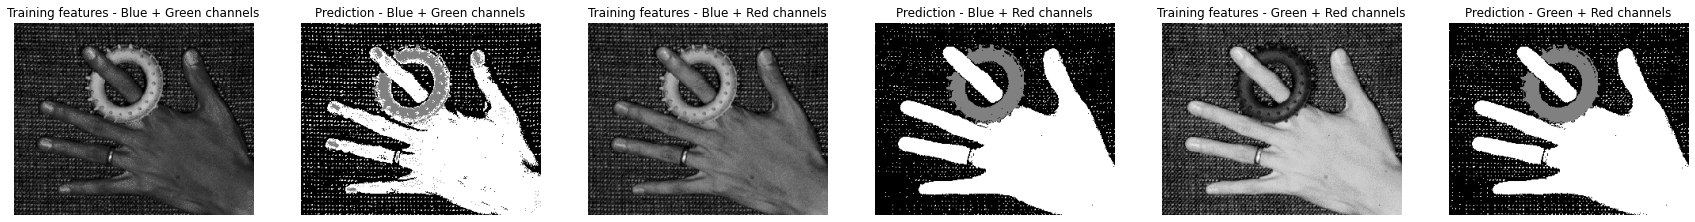

In [136]:
predictions_bg = train_multiplefeature(im[:,:,:-1], labelbw, 'LDA')
predictions_br = train_multiplefeature(im[:,:,(0,2)], labelbw, 'LDA')
predictions_gr = train_multiplefeature(im[:,:,1:], labelbw, 'LDA')

fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=6, figsize=(30, 5))
ax0.imshow(im[:,:,0], cmap=cm.gray)
ax0.axis('off')
ax0.set_title('Training features - Blue + Green channels')
ax1.imshow(predictions_bg, cmap=cm.gray)
ax1.axis('off')
ax1.set_title('Prediction - Blue + Green channels')
ax2.imshow(im[:,:,1], cmap=cm.gray)
ax2.axis('off')
ax2.set_title('Training features - Blue + Red channels')
ax3.imshow(predictions_br, cmap=cm.gray)
ax3.axis('off')
ax3.set_title('Prediction - Blue + Red channels')
ax4.imshow(im[:,:,2], cmap=cm.gray)
ax4.axis('off')
ax4.set_title('Training features - Green + Red channels')
ax5.imshow(predictions_gr, cmap=cm.gray)
ax5.axis('off')
ax5.set_title('Prediction - Green + Red channels')